In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv('week2.csv')

In [6]:
df.head(5)

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Year,Month,Avg Price(CP+HP+LP),VWAP,Profit/Loss Percentage,Day_Perc_Change,trend
0,2019-10-24,1780.78,"1,770.78",1787.97,1760.78,5200000.0,2019,10,1776.510000,1776.510000,0.010561,0.000000,Slight or no change
1,2019-10-23,1762.17,"1,761.30",1770.05,1742.00,2190000.0,2019,10,1758.073333,1758.073333,-0.002016,-0.010450,Slight or no change
2,2019-10-22,1765.73,"1,788.15",1789.78,1762.00,2230000.0,2019,10,1772.503333,1772.503333,-0.011161,0.002020,Slight or no change
3,2019-10-21,1785.66,"1,769.66",1785.88,1765.00,2220000.0,2019,10,1778.846667,1778.846667,0.016017,0.011287,Slight or no change
4,2019-10-18,1757.51,"1,787.80",1793.98,1749.20,3370000.0,2019,10,1766.896667,1766.896667,-0.016767,-0.015764,Slight or no change


In [7]:
# converting date column datatype to datetime64[ns] format
df['Date'] = df['Date'].astype('datetime64')

In [8]:
df.dtypes

Date                      datetime64[ns]
Close Price                      float64
Open Price                        object
High Price                       float64
Low Price                        float64
Total Traded Quantity            float64
Year                               int64
Month                              int64
Avg Price(CP+HP+LP)              float64
VWAP                             float64
Profit/Loss Percentage           float64
Day_Perc_Change                  float64
trend                             object
dtype: object

In [9]:
# setting date column as a index 
# inplace is used to make the changes permanently
df.set_index('Date', inplace = True)

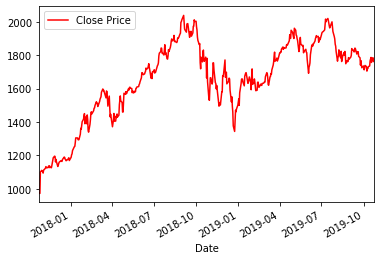

In [10]:
df.plot(y = 'Close Price', color = 'red')

C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


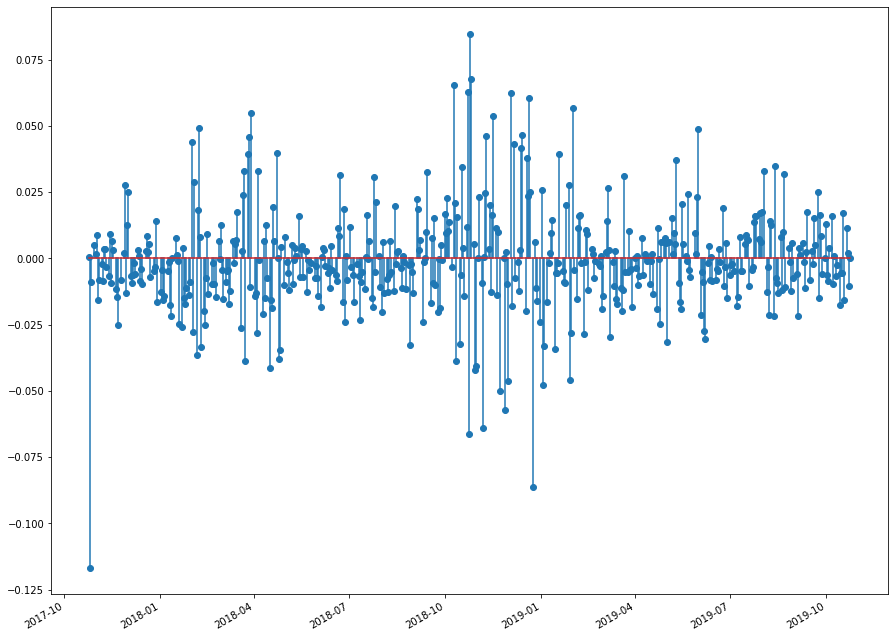

In [11]:
fig, ax = plt.subplots(figsize = (15,12))
# to use the index of a data frame in the plots we specify it not by name but by 'df.index'
ax.stem(df.index, df.Day_Perc_Change)
# the command below is used for better visuals of date axis
# dates were crammed and overlapping therefore decreasing the readability
fig.autofmt_xdate()

C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


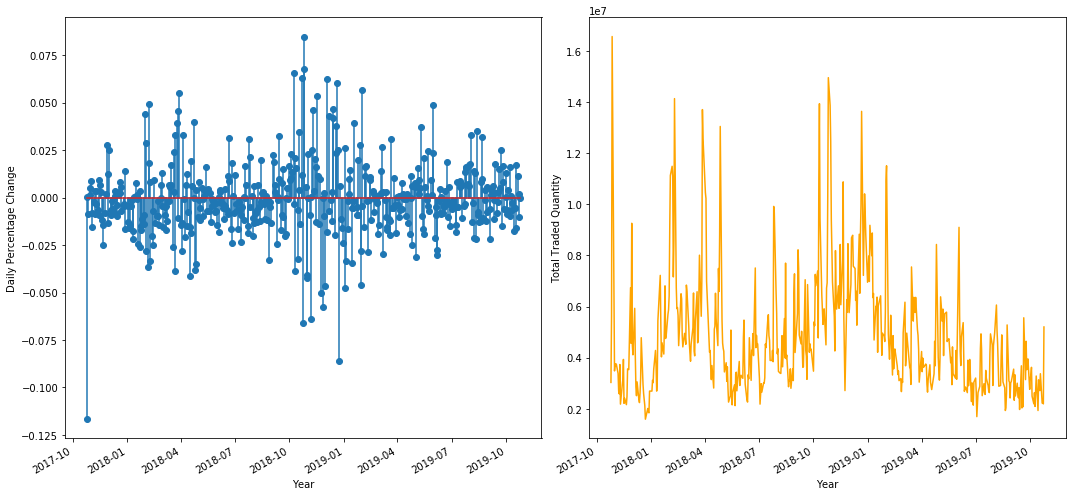

In [12]:
df.rename(columns={'Total Traded Quantity': 'Total_Traded_Quantity'}, inplace = True)
fig, ax = plt.subplots(1,2,figsize = (15,7))
ax[0].stem(df.index, df.Day_Perc_Change)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Daily Percentage Change')
fig.autofmt_xdate()
ax[1].plot(df.index, df.Total_Traded_Quantity, color = 'orange')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Total Traded Quantity')
fig.autofmt_xdate()
plt.tight_layout()

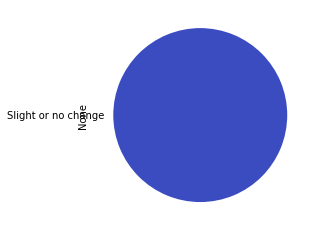

In [13]:
# this command will also perform the same function
# df['trend'].value_counts().plot(kind = 'pie', y = 'trend', colormap = 'coolwarm')

df.groupby('trend').size().plot(kind = 'pie', y = 'trend', colormap = 'coolwarm')

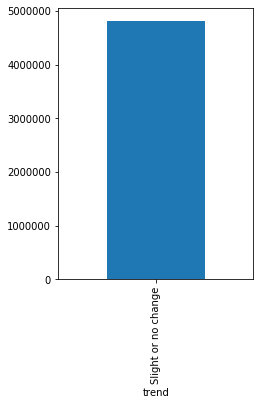

In [14]:
df.groupby('trend').mean()['Total_Traded_Quantity'].plot(kind = 'bar',figsize = (3.5,5))

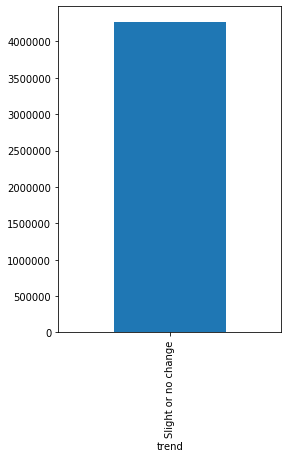

In [15]:
df.groupby('trend').median()['Total_Traded_Quantity'].plot(kind = 'bar', figsize = (4,6))

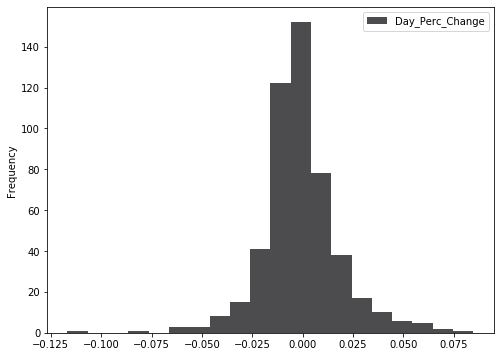

In [16]:
df.plot(kind = 'hist', y= 'Day_Perc_Change', bins = 20, figsize = (8,6), colormap ='inferno',alpha = 0.7 )

In [17]:
df1 = pd.read_csv('DHFL.csv')
df2 = pd.read_csv('IGL.csv')
df3 = pd.read_csv('PNB.csv')
df4 = pd.read_csv('TATAPOWER.csv')
df5 = pd.read_csv('VOLTAS.csv')

In [18]:
# obtaining rows where the series column value is EQ
# resetting the index
df1 = df1[df1['Series'] == 'EQ'].reset_index()
df2 = df2[df2['Series'] == 'EQ'].reset_index()
df3 = df3[df3['Series'] == 'EQ'].reset_index()
df4 = df4[df4['Series'] == 'EQ'].reset_index()
df5 = df5[df5['Series'] == 'EQ'].reset_index()

In [19]:
# created a new dataframe from a column of another data frame
# used transpose function for converting it to column (from a row)
# reset the index such that the 'close price' shifts from index to a column
df_c = pd.DataFrame(columns = df1['Close Price']).transpose().reset_index()

In [20]:
df_c.rename(columns ={'Close Price': 'DHFL'}, inplace = True)

In [21]:
df_c['IGL'] = df2['Close Price']
df_c['PNB'] = df3['Close Price']
df_c['TATAPOWER'] = df4['Close Price']
df_c['VOLTAS'] = df5['Close Price']

In [22]:
df_c.head()

,DHFL,IGL,PNB,TATAPOWER,VOLTAS
0,431.40,1000.25,166.80,83.55,431.85
1,424.45,1005.80,174.15,83.85,432.45
2,429.00,1019.10,165.05,85.35,430.20
3,417.95,1002.55,158.50,83.75,414.10
4,404.20,1000.15,155.20,84.15,415.75


In [23]:
# made copy to perform percentage change function
df_perc_change = df_c.copy()

In [24]:
# performed percentage change function and drop the rows with Nan values
df_perc_change = df_perc_change.pct_change().dropna()

In [25]:
df_perc_change.head()

,DHFL,IGL,PNB,TATAPOWER,VOLTAS
1,-0.016110,0.005549,0.044065,0.003591,0.001389
2,0.010720,0.013223,-0.052254,0.017889,-0.005203
3,-0.025758,-0.016240,-0.039685,-0.018746,-0.037424
4,-0.032899,-0.002394,-0.020820,0.004776,0.003985
5,-0.000495,-0.012948,-0.027384,-0.024955,-0.000241


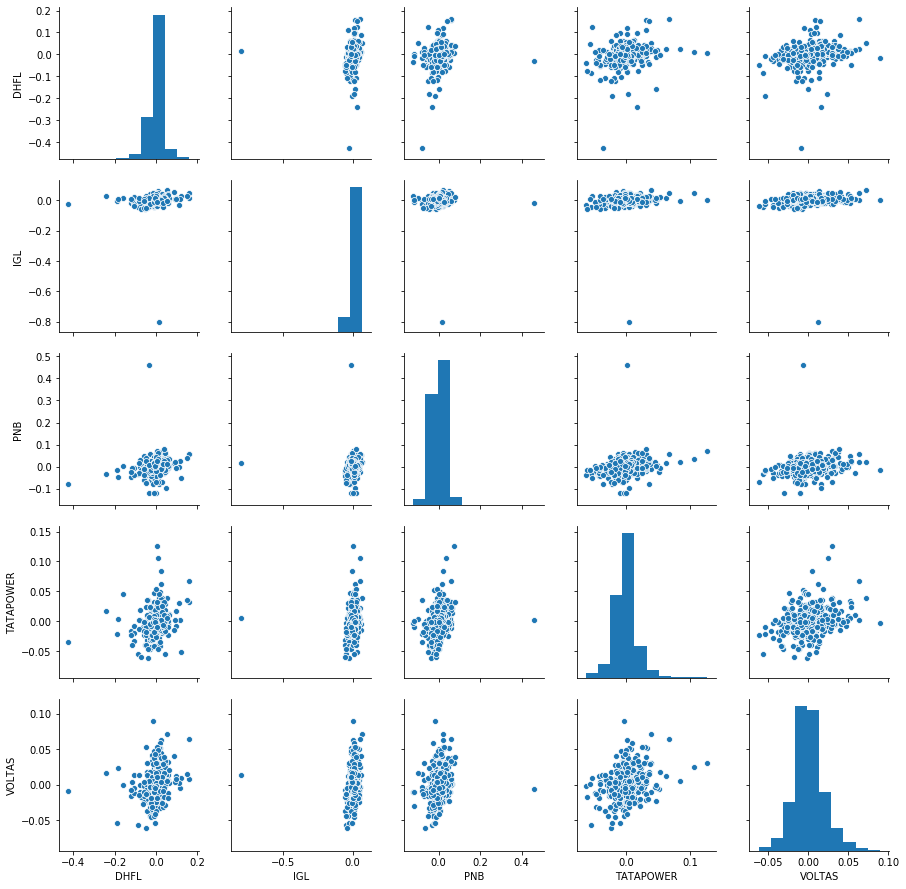

In [26]:
# pairplot for correlation between different shares
sns.pairplot(df_perc_change, palette = 'inferno' )

In [27]:
# rolling is used calculate anything (like : mean, standard deviation etc) over a window 
# here window size is 7
# it will take first 7 values and calculate the mean
# then it will drop the 1st value and pick up 8th value and then calculate the mean
# this will continue till the end of the column
df_perc_change['DHFL_roll_mean'] = df_perc_change['DHFL'].rolling(7).mean()

In [28]:
df_perc_change['DHFL_roll_std'] = df_perc_change['DHFL'].rolling(7).std()
df_perc_change.head(10)

,DHFL,IGL,PNB,TATAPOWER,VOLTAS,DHFL_roll_mean,DHFL_roll_std
1,-0.016110,0.005549,0.044065,0.003591,0.001389,NaN,NaN
2,0.010720,0.013223,-0.052254,0.017889,-0.005203,NaN,NaN
3,-0.025758,-0.016240,-0.039685,-0.018746,-0.037424,NaN,NaN
4,-0.032899,-0.002394,-0.020820,0.004776,0.003985,NaN,NaN
5,-0.000495,-0.012948,-0.027384,-0.024955,-0.000241,NaN,NaN
6,-0.004950,-0.005825,-0.007950,-0.018891,-0.013954,NaN,NaN
7,-0.016045,0.001223,-0.015359,-0.003106,0.089423,-0.012220,0.015040
8,0.025155,0.001832,0.022041,0.001869,0.063270,-0.006325,0.020395
9,0.012700,0.042257,-0.000332,0.008085,0.050026,-0.006042,0.020682
10,0.000731,0.000000,-0.036840,0.001234,-0.027884,-0.002258,0.018812


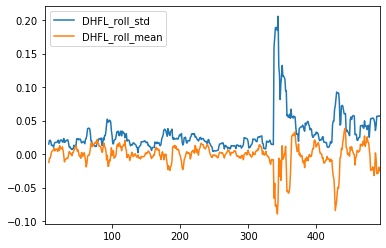

In [29]:
df_perc_change.plot(y = ['DHFL_roll_std', 'DHFL_roll_mean'], kind = 'line') 

In [30]:
df_nifty = pd.read_csv('Nifty50.csv')

In [31]:
df_nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [32]:
# volatility is how much the stock can deviate from its mean price range
df_nifty['Volatility'] = df_nifty['Close'].rolling(7).std()

Text(0.5, 1.0, 'DHFL and Nifty')

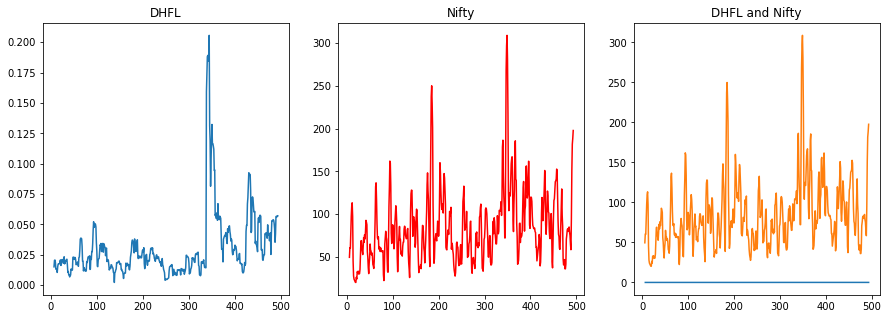

In [33]:
fig, ax = plt.subplots(1,3 , figsize=(15, 5))

ax[0].plot(df_perc_change.DHFL_roll_std)
ax[0].set_title('DHFL')
ax[1].plot(df_nifty.Volatility, color = 'red')
ax[1].set_title('Nifty')
ax[2].plot(df_perc_change.DHFL_roll_std)
ax[2].plot(df_nifty.Volatility)
ax[2].set_title('DHFL and Nifty')

In [34]:
df_nifty['mov_avg_21'] = df_nifty['Close'].rolling(21).mean()
df_nifty['mov_avg_34'] = df_nifty['Close'].rolling(34).mean()

Text(0.5, 1.0, '21 and 34 day moving average')

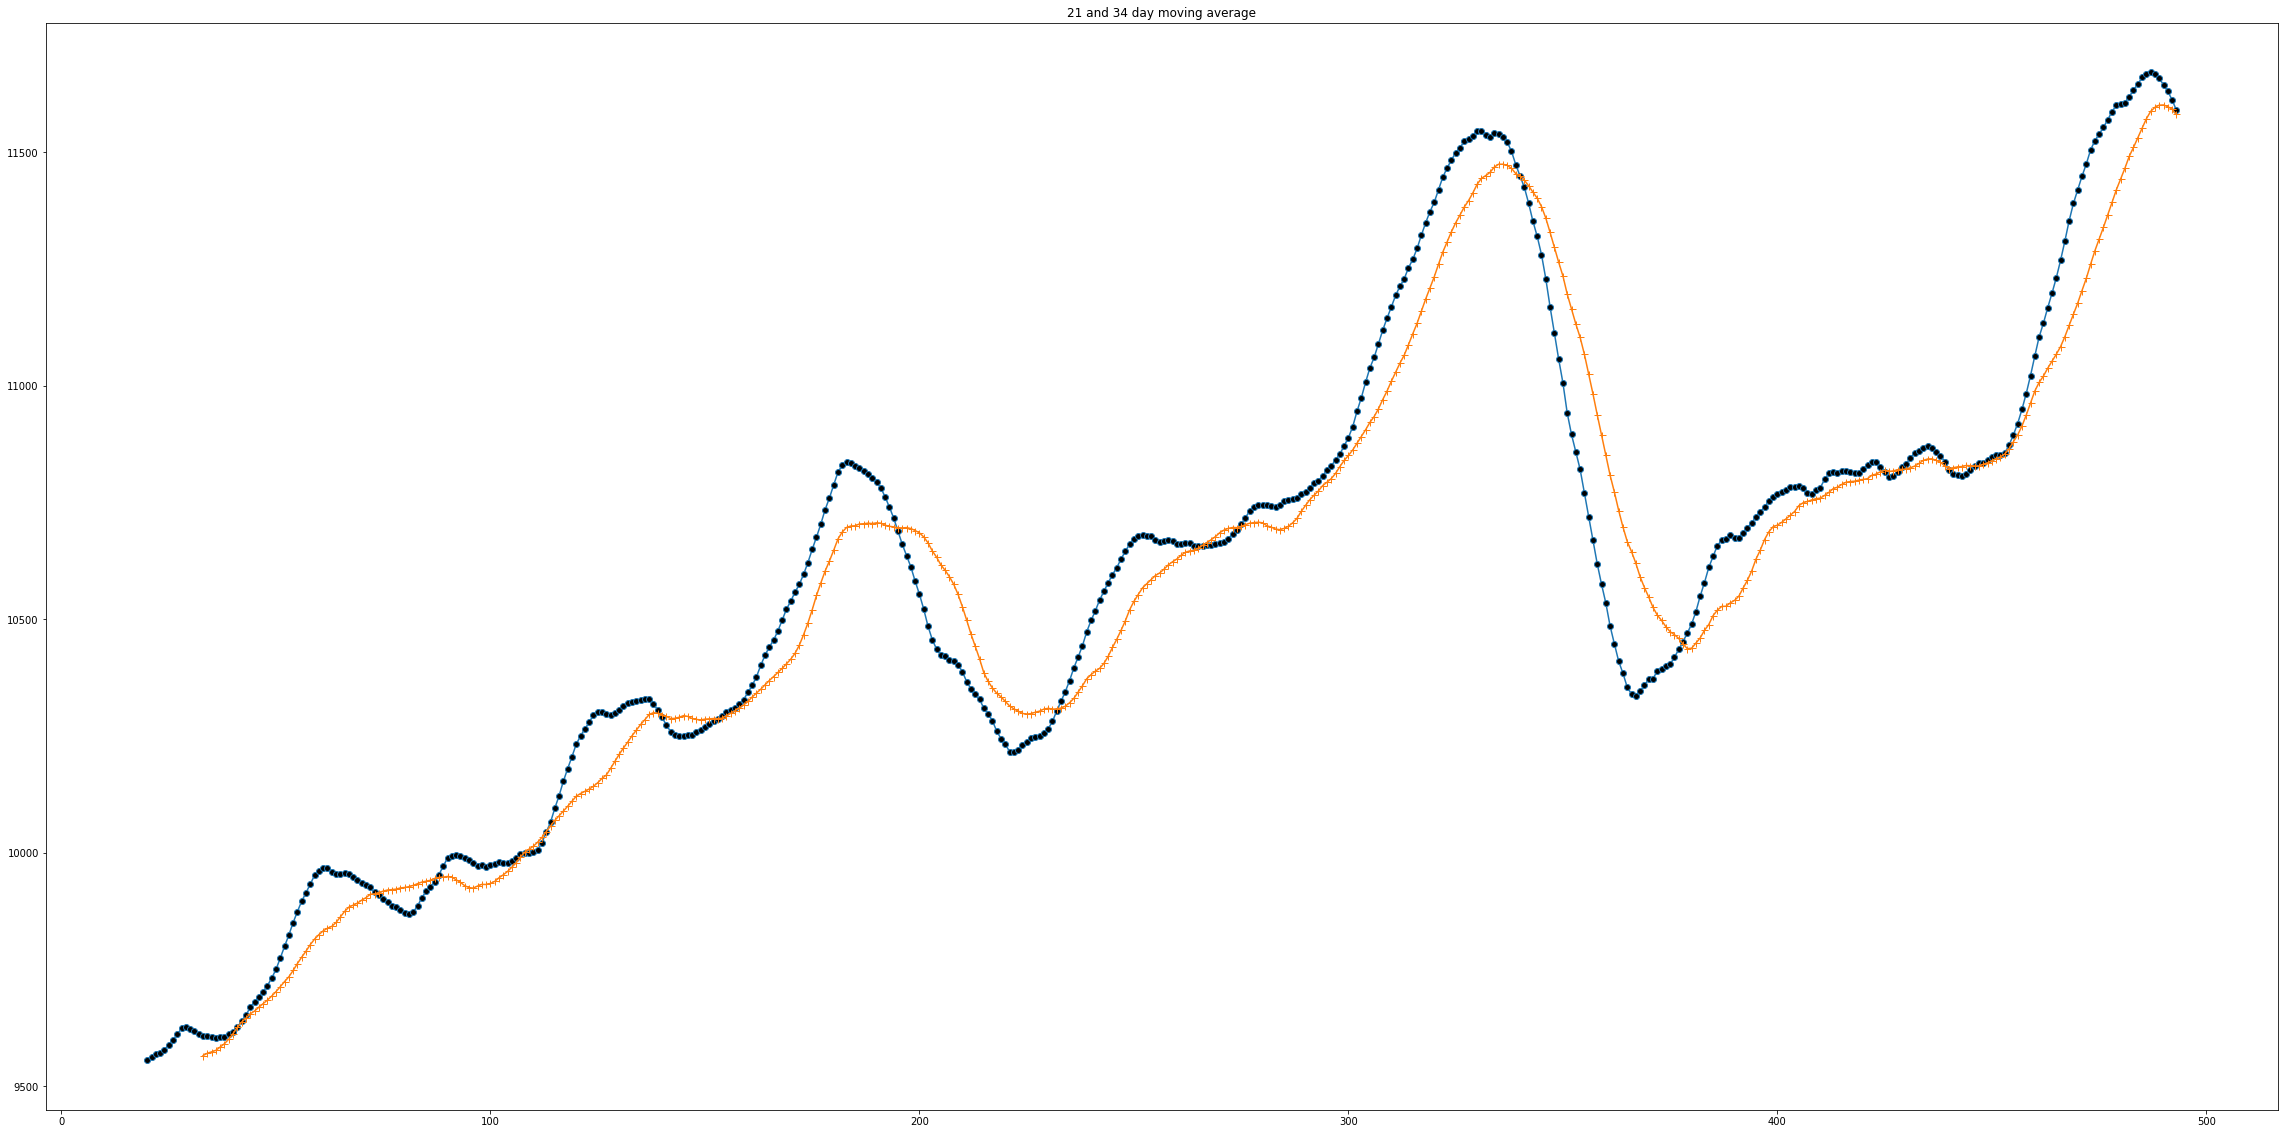

In [35]:
fig, ax = plt.subplots(figsize=(40, 20))

ax.plot(df_nifty.mov_avg_21, marker = 'o', markersize = 6, markerfacecolor = 'black')
ax.plot(df_nifty.mov_avg_34, marker = '+', markersize = 7, markerfacecolor = 'red')
ax.set_title('21 and 34 day moving average')

In [36]:
# setting up column to decide if we should buy or sell the stocks
# if the 21 day moving average is greater than the 34 day moving average then we buy it or else we sell it
cond = [df_nifty['mov_avg_21'] >= df_nifty['mov_avg_34'], df_nifty['mov_avg_21'] < df_nifty['mov_avg_34'] ]
choices = ['Buy','Sell']
df_nifty['Call'] = np.select(cond,choices)

In [37]:
df_nifty['Call'].value_counts()

Buy     331
Sell    130
0        33
Name: Call, dtype: int64

In [38]:
df_c.head()

,DHFL,IGL,PNB,TATAPOWER,VOLTAS
0,431.40,1000.25,166.80,83.55,431.85
1,424.45,1005.80,174.15,83.85,432.45
2,429.00,1019.10,165.05,85.35,430.20
3,417.95,1002.55,158.50,83.75,414.10
4,404.20,1000.15,155.20,84.15,415.75


In [39]:
# plotting Bollinger Bands
# in total there are 4 plots
# x days moving average ( here x = 14)
# Daily average
# BOLU --> Upper Bollinger Band --> x days moving average + 2* x days moving standard deviation
# BOLD --> Lower Bollinger Band --> x days moving average - 2* x days moving standard deviation
df_c['mov_avg_14'] = df_c['DHFL'].rolling(14).mean()
df_c['mov_std_14'] = df_c['DHFL'].rolling(14).std() 

df_c['Upper'] = (df_c['mov_avg_14']) + (df_c['mov_std_14'] * 2)
df_c['Lower'] = (df_c['mov_avg_14']) - (df_c['mov_std_14'] * 2)
df_c['Daily_Average_DHFL'] = (df1['Low Price'] + df1['Close Price'] + df1['High Price'])/3

Text(0.5, 1.0, 'Bollinger Bands')

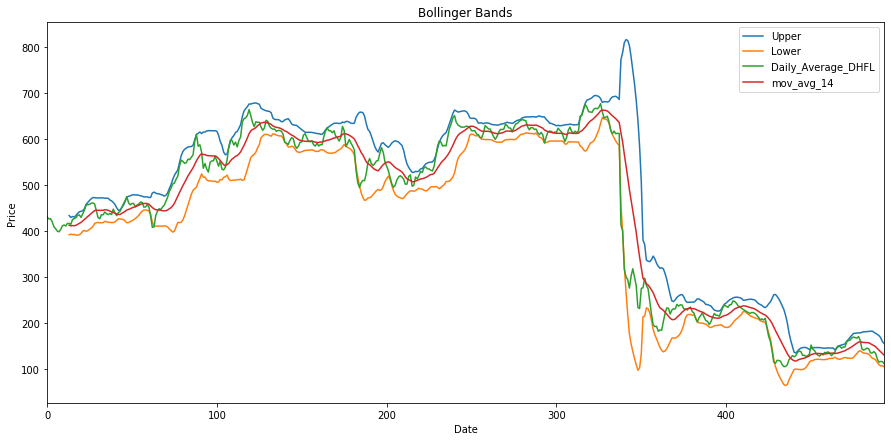

In [40]:
df_c.plot(y = ['Upper','Lower','Daily_Average_DHFL','mov_avg_14'], kind = 'line', figsize = (15,7))
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Bollinger Bands')

In [41]:
df_c.to_csv('Stock comb.csv', index = False)